In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('ecommerce_data.csv')
df.head()

,cust_id,gender,age,no_of_purchases,amount_spend,time_spent_on_site,cross_sell_conversion_rate
0,C0001,Male,36,4,400,41.02,0.597870
1,C0002,Male,42,4,360,49.42,0.087063
2,C0003,Male,40,2,60,35.78,0.441260
3,C0004,Female,33,3,240,39.17,0.553303
4,C0005,Male,24,6,120,63.42,0.860697


## **Q1**

In [3]:
min_age = df['age'].min()
max_age = df['age'].max()

age_range = max_age - min_age
print('The age range of customers in the dataset:',age_range)

The age range of customers in the dataset: 47


## **Q2**

In [4]:
df.describe()

,age,no_of_purchases,amount_spend,time_spent_on_site,cross_sell_conversion_rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.418000,4.053000,238.230000,45.171110,0.428629
std,12.354186,1.965211,155.937435,16.666794,0.273603
min,18.000000,1.000000,20.000000,13.190000,0.000568
25%,23.000000,2.000000,120.000000,30.937500,0.204250
50%,30.000000,4.000000,200.000000,44.635000,0.387122
75%,41.000000,6.000000,320.000000,56.352500,0.605406
max,65.000000,8.000000,800.000000,92.530000,0.996979


In [5]:
mean_amt = df.amount_spend.mean()
median_amt = df.amount_spend.median()
mode_amt = df.amount_spend.mode()

print('Mean amount spent by the customers:',mean_amt)
print('Median amount spent by the customers:',median_amt)
print('Mode amount spent by the customers:',mode_amt[0])

Mean amount spent by the customers: 238.23
Median amount spent by the customers: 200.0
Mode amount spent by the customers: 240


## **Q3**

In [6]:
var_time = df['time_spent_on_site'].var()
std_time = df['time_spent_on_site'].std()

print('Variance of time spent on the site:', np.round(var_time,2))
print('Standard deviation of time spent on the site', np.round(std_time,2))

Variance of time spent on the site: 277.78
Standard deviation of time spent on the site 16.67


## **Q4**

In [7]:
q1 = df.amount_spend.quantile(0.25)
q3 = df.amount_spend.quantile(0.75)

iqr = q3 - q1
print('Interquartile range for the amount spent by the customers:', iqr)

Interquartile range for the amount spent by the customers: 200.0


## **Q5**

In [8]:
corr = df.corr(numeric_only=True)

corr

,age,no_of_purchases,amount_spend,time_spent_on_site,cross_sell_conversion_rate
age,1.000000,-0.783331,-0.549364,-0.736895,-0.394860
no_of_purchases,-0.783331,1.000000,0.651472,0.937617,0.667435
amount_spend,-0.549364,0.651472,1.000000,0.602786,0.422893
time_spent_on_site,-0.736895,0.937617,0.602786,1.000000,0.631063
cross_sell_conversion_rate,-0.394860,0.667435,0.422893,0.631063,1.000000


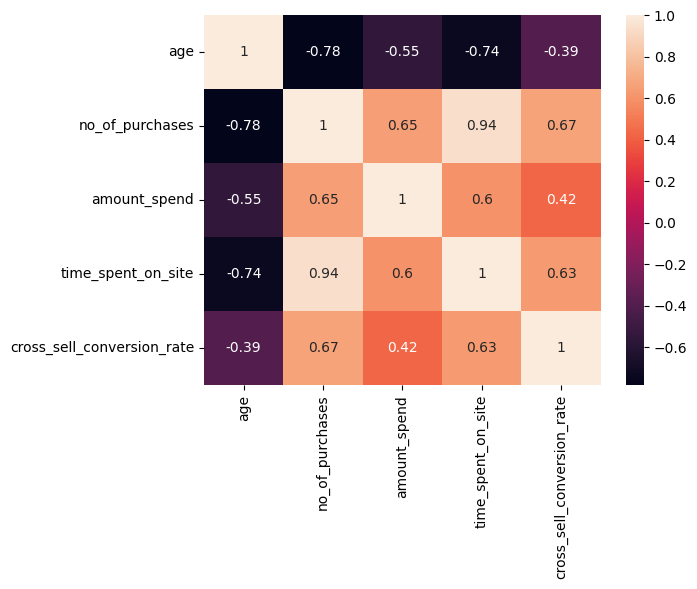

In [9]:
import seaborn as sns

sns.heatmap(corr, annot=True);

## **Q6**

In [10]:
df.head()

,cust_id,gender,age,no_of_purchases,amount_spend,time_spent_on_site,cross_sell_conversion_rate
0,C0001,Male,36,4,400,41.02,0.597870
1,C0002,Male,42,4,360,49.42,0.087063
2,C0003,Male,40,2,60,35.78,0.441260
3,C0004,Female,33,3,240,39.17,0.553303
4,C0005,Male,24,6,120,63.42,0.860697


In [11]:
mean_amt

np.float64(238.23)

In [12]:
std_amt = df['amount_spend'].std()
std_amt

np.float64(155.93743483712814)

In [13]:
# Z-Score for customer spending $450 on the website
z_score = (450 - 238.23)/155.93
print('Z-Score for customer spending $450 on the website:', np.round(z_score,2))

Z-Score for customer spending $450 on the website: 1.36


## **Q7**

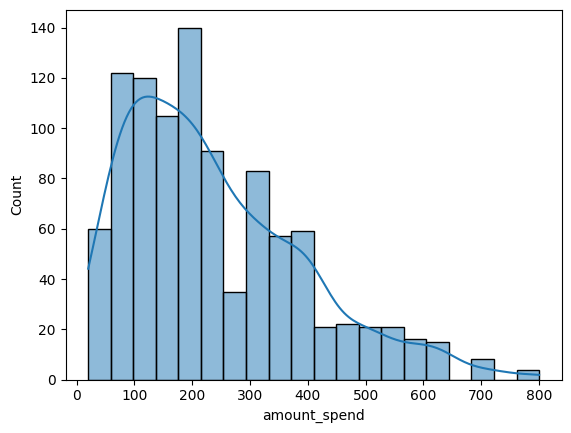

In [14]:
sns.histplot(df, x='amount_spend', kde=True);

In [15]:
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import scipy

skew = scipy.stats.skew(df['amount_spend'])
print('Skewness of amount spend:',np.round(skew,2))

Skewness of amount spend: 0.96


## **Q8**

In [17]:
df.head()

,cust_id,gender,age,no_of_purchases,amount_spend,time_spent_on_site,cross_sell_conversion_rate
0,C0001,Male,36,4,400,41.02,0.597870
1,C0002,Male,42,4,360,49.42,0.087063
2,C0003,Male,40,2,60,35.78,0.441260
3,C0004,Female,33,3,240,39.17,0.553303
4,C0005,Male,24,6,120,63.42,0.860697


In [18]:
total_purchases = df['no_of_purchases'].sum()
total_purchases

np.int64(4053)

In [19]:
more_than_5_purchases = df['no_of_purchases'] > 5 # boolean indexing for whole dataset
more_than_5_purchases

0      False
1      False
2      False
3      False
4       True
       ...  
995     True
996    False
997    False
998    False
999    False
Name: no_of_purchases, Length: 1000, dtype: bool

In [20]:
P_A = more_than_5_purchases.mean()
print('Probability of a person making more than 5 purchases:',P_A)

Probability of a person making more than 5 purchases: 0.255


In [21]:
more_than_300_dollars = df['amount_spend'] > 300
more_than_300_dollars

0       True
1       True
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998     True
999    False
Name: amount_spend, Length: 1000, dtype: bool

In [22]:
P_B = more_than_300_dollars.mean()
print('Probability of a customer spending more than 300$:', P_B)

Probability of a customer spending more than 300$: 0.28


In [23]:
more_than_5_and_300 = (df['no_of_purchases'] > 5) & (df['amount_spend'] > 300)
more_than_5_and_300


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [24]:
P_A_and_B = more_than_5_and_300.mean()
print('Probability of a customer making more than 5 purchases and spending more than 300$:',P_A_and_B)

Probability of a customer making more than 5 purchases and spending more than 300$: 0.139


In [25]:
P_A_or_B = P_A + P_B - P_A_and_B
print('Probability that a randomly selected customer makes more than 5 purchases in a month or spends more than $300:', P_A_or_B)

Probability that a randomly selected customer makes more than 5 purchases in a month or spends more than $300: 0.396


## **Q9**

In [26]:
df_mean = df['amount_spend'].mean() # considering our dataset as sample of the population
df_std = df['amount_spend'].std()
df_std_sample = (df_std)/np.sqrt(1000)

print('Sample mean:',df_mean)
print('Sample standard deviation (standard error):',df_std_sample)

Sample mean: 238.23
Sample standard deviation (standard error): 4.931174665694127


In [27]:
np.round(df_mean,0)

np.float64(238.0)

##  **95% conf interval means zscore of 1.96**
## **mu = xbar +- z * std(of sample)**

In [28]:
upper_bound = df_mean + (1.96 * (np.round(df_std_sample,2)))
lower_bound = df_mean - (1.96 * (np.round(df_std_sample,2)))
print('95% confidence interval for sample mean xbar:', (np.round(lower_bound,2), np.round(upper_bound,2)))

95% confidence interval for sample mean xbar: (np.float64(228.57), np.float64(247.89))


In [29]:
len(df)

1000

In [30]:
import scipy.stats as st
z_score_95_confidence = st.norm.ppf(0.975) # enter cu prob = 95% + 2.5% left tail

df_mean = df['amount_spend'].mean() # considering our dataset as sample of the population
df_std = df['amount_spend'].std()
std_error = (df_std)/np.sqrt(1000)
margin_of_error = z_score_95_confidence * std_error

lower_bound = df_mean - margin_of_error
upper_bound = df_mean + margin_of_error
print('95% confidence interval for population mean:', (np.round(lower_bound,2), np.round(upper_bound,2)))

95% confidence interval for population mean: (np.float64(228.57), np.float64(247.89))


In [31]:
df.isna().sum()

cust_id                       0
gender                        0
age                           0
no_of_purchases               0
amount_spend                  0
time_spent_on_site            0
cross_sell_conversion_rate    0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cust_id                     1000 non-null   object 
 1   gender                      1000 non-null   object 
 2   age                         1000 non-null   int64  
 3   no_of_purchases             1000 non-null   int64  
 4   amount_spend                1000 non-null   int64  
 5   time_spent_on_site          1000 non-null   float64
 6   cross_sell_conversion_rate  1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


## **Q10**

In [35]:
df

,cust_id,gender,age,no_of_purchases,amount_spend,time_spent_on_site,cross_sell_conversion_rate
0,C0001,Male,36,4,400,41.02,0.597870
1,C0002,Male,42,4,360,49.42,0.087063
2,C0003,Male,40,2,60,35.78,0.441260
3,C0004,Female,33,3,240,39.17,0.553303
4,C0005,Male,24,6,120,63.42,0.860697
...,...,...,...,...,...,...,...
995,C0996,Female,32,6,300,60.03,0.696032
996,C0997,Male,26,3,90,32.89,0.351948
997,C0998,Male,41,3,90,33.06,0.249554
998,C0999,Male,35,4,400,44.19,0.418413


In [36]:
high_cross_sell_conversion = df['cross_sell_conversion_rate'] > 0.8
high_cross_sell_conversion

0      False
1      False
2      False
3      False
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: cross_sell_conversion_rate, Length: 1000, dtype: bool

In [41]:
P_A = high_cross_sell_conversion.mean()
print('Probability of customers that have a cross sell conversion rate:', P_A)

Probability of customers that have a cross sell conversion rate: 0.135


In [42]:
more_than_5_purchases = df['no_of_purchases'] >= 5
more_than_5_purchases

0      False
1      False
2      False
3      False
4       True
       ...  
995     True
996    False
997    False
998    False
999     True
Name: no_of_purchases, Length: 1000, dtype: bool

In [43]:
P_B = more_than_5_purchases.mean()
print('Probability of a customer making more than 5 purchases:', P_B)

Probability of a customer making more than 5 purchases: 0.385


In [48]:
more_than_5 = df[df['no_of_purchases'] >= 5]
high_cross_sell_conv_given_more_than_5 = more_than_5['cross_sell_conversion_rate'] > 0.8
high_cross_sell_conv_given_more_than_5

4       True
6       True
11     False
12      True
14     False
       ...  
990     True
991     True
992    False
995    False
999    False
Name: cross_sell_conversion_rate, Length: 385, dtype: bool

In [51]:
P_B_given_A = high_cross_sell_conv_given_more_than_5.mean()
print('Probability of high cross sell converters given they make 5 or more purchases:', P_B_given_A)

Probability of high cross sell converters gieven they make 5 or more purchases: 0.35064935064935066


In [53]:
P_A_given_B = (P_B_given_A * P_A) / P_B
print('Probability that a customer who makes 5 or more purchases in a month will have a high cross-sell conversion rate (greater than 80%):', np.round(P_B_given_A,3))

Probability that a customer who makes 5 or more purchases in a month will have a high cross-sell conversion rate (greater than 80%): 0.351
